In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.utils.data as Data
import imageio
from keras import backend as K
K.clear_session()

# Real (Measured) data

In [2]:
import scipy.io
v = (scipy.io.loadmat('PA_data_for_NN/rfsoc_nn_training.mat')['x'][0]).astype(np.complex64)
v = np.reshape(v,(-1,1))
y = (scipy.io.loadmat('PA_data_for_NN/rfsoc_nn_training.mat')['y'][0]).astype(np.complex64)
y = np.reshape(y,(-1,1))

In [3]:
print(y.shape)
print(y.shape)

(6816000, 1)
(6816000, 1)


In [4]:
#plt.plot(np.abs(v), np.abs(y),'.')

def normalize(criteria):
  # mean normalization
  max = np.max(criteria)
  min = np.min(criteria)
  avg = np.mean(criteria)
  return (criteria-avg)/(max-min)

v=normalize(v).astype(np.complex64)
y=normalize(y).astype(np.complex64)


#v = np.concatenate((v, v), axis=0)
#y = np.concatenate((y, y), axis=0)



#plt.plot(np.abs(v), np.abs(y),'.')


# NN with splitted inputs

In [5]:
# v input data
# y output data
input_v = np.concatenate([v.real, v.imag], axis=1)
output_y = np.concatenate([y.real, y.imag], axis=1)
input_v = input_v.astype(float)
output_y = output_y.astype(float)
print(input_v[:2])
print(v[:2])
print(output_y[:2])
print(y[:2])
input_v = np.reshape(input_v,(-1,4,2))
output_y = np.reshape(output_y,(-1,4,2))
print(v[:2])

[[5.63974891e-06 1.99485680e-06]
 [5.63768390e-06 1.99291230e-06]]
[[5.639749e-06+1.9948568e-06j]
 [5.637684e-06+1.9929123e-06j]]
[[-0.00135503  0.00116611]
 [ 0.00264729 -0.0001863 ]]
[[-0.00135503+0.00116611j]
 [ 0.00264729-0.0001863j ]]
[[5.639749e-06+1.9948568e-06j]
 [5.637684e-06+1.9929123e-06j]]


In [6]:
print(input_v.shape)
print(output_y.shape)

(1704000, 4, 2)
(1704000, 4, 2)


In [18]:
import numpy as np
import tensorflow as tf
import keras.backend as K

def get_model2():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(128, return_sequences=True, activation='relu', dtype='float64'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid', dtype='float64'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid', dtype='float64'))
    model.add(tf.keras.layers.Dense(50, activation='sigmoid', dtype='float64'))
    model.add(tf.keras.layers.Dense(20, activation='sigmoid', dtype='float64'))
    model.add(tf.keras.layers.Dense(2, activation='linear', dtype='float64'))   
    return model


model2 = get_model2()   # Get your model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=100,
    decay_rate=0.9)

# Compile as any TensorFlow model
#model2.compile(tf.keras.optimizers.Adam(), loss="MSE")
model2.compile(optimizer = "Adam", loss = "MSE", 
              metrics =["accuracy"])


In [19]:
input_shape = None,4,2
model2.build(input_shape)
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                multiple                  67072     
_________________________________________________________________
dense_10 (Dense)             multiple                  12900     
_________________________________________________________________
dense_11 (Dense)             multiple                  10100     
_________________________________________________________________
dense_12 (Dense)             multiple                  5050      
_________________________________________________________________
dense_13 (Dense)             multiple                  1020      
_________________________________________________________________
dense_14 (Dense)             multiple                  42        
Total params: 96,184
Trainable params: 96,184
Non-trainable params: 0
__________________________________________________

In [ ]:
history2 = model2.fit(input_v, output_y, epochs=100, batch_size = 1000, validation_split=0.2)

Epoch 1/100
1364/1364 [==============================] - 38s 28ms/step - loss: 0.0073 - accuracy: 0.8518 - val_loss: 3.7323e-04 - val_accuracy: 0.9495
Epoch 2/100
1364/1364 [==============================] - 33s 24ms/step - loss: 3.1470e-04 - accuracy: 0.9501 - val_loss: 2.7845e-04 - val_accuracy: 0.9529
Epoch 3/100
1364/1364 [==============================] - 34s 25ms/step - loss: 2.7527e-04 - accuracy: 0.9528 - val_loss: 2.7168e-04 - val_accuracy: 0.9549
Epoch 4/100
1364/1364 [==============================] - 36s 27ms/step - loss: 2.5687e-04 - accuracy: 0.9547 - val_loss: 2.7022e-04 - val_accuracy: 0.9525
Epoch 5/100
1364/1364 [==============================] - 34s 25ms/step - loss: 2.4380e-04 - accuracy: 0.9562 - val_loss: 2.4960e-04 - val_accuracy: 0.9580
Epoch 6/100
1364/1364 [==============================] - 35s 26ms/step - loss: 2.3455e-04 - accuracy: 0.9574 - val_loss: 2.5405e-04 - val_accuracy: 0.9549
Epoch 7/100
1364/1364 [==============================] - 33s 24ms/step - l

1364/1364 [==============================] - 36s 26ms/step - loss: 1.9684e-04 - accuracy: 0.9614 - val_loss: 1.9449e-04 - val_accuracy: 0.9619
Epoch 54/100
1364/1364 [==============================] - 35s 26ms/step - loss: 1.9652e-04 - accuracy: 0.9613 - val_loss: 1.9702e-04 - val_accuracy: 0.9616
Epoch 55/100
1364/1364 [==============================] - 33s 24ms/step - loss: 1.9665e-04 - accuracy: 0.9613 - val_loss: 2.0323e-04 - val_accuracy: 0.9593
Epoch 56/100
1364/1364 [==============================] - 35s 26ms/step - loss: 1.9708e-04 - accuracy: 0.9613 - val_loss: 2.0028e-04 - val_accuracy: 0.9610
Epoch 57/100
1364/1364 [==============================] - 36s 26ms/step - loss: 1.9638e-04 - accuracy: 0.9614 - val_loss: 2.0790e-04 - val_accuracy: 0.9591
Epoch 58/100
1364/1364 [==============================] - 35s 25ms/step - loss: 1.9662e-04 - accuracy: 0.9613 - val_loss: 1.9734e-04 - val_accuracy: 0.9617
Epoch 59/100
1364/1364 [==============================] - 34s 25ms/step - los

In [10]:
output_y2= model2.predict(input_v)

In [11]:
print(output_y.shape)
print(output_y2.shape)
print(output_y[:2])
print(output_y2[:2])

(1704000, 4, 2)
(1704000, 4, 2)
[[[-0.00135503  0.00116611]
  [ 0.00264729 -0.0001863 ]
  [ 0.00318816  0.00095825]
  [ 0.00409739  0.00203333]]

 [[ 0.00209543 -0.00090787]
  [-0.00112976 -0.00289811]
  [-0.00037652 -0.00079366]
  [-0.00129316 -0.00421809]]]
[[[ 1.6723759e-03 -1.7054938e-04]
  [ 1.6769581e-03 -2.3518130e-04]
  [ 1.8438045e-03 -4.9103796e-04]
  [ 2.0412505e-03 -9.9161640e-05]]

 [[ 1.6724262e-03 -1.7055683e-04]
  [ 1.6770922e-03 -2.3514964e-04]
  [ 1.8439777e-03 -4.9091130e-04]
  [ 2.0412523e-03 -9.8966062e-05]]]


(1704000, 4)
(6816000, 1)
[[-0.00135503+0.00116611j]
 [ 0.00264729-0.0001863j ]]
[[0.00167238-0.00017055j]
 [0.00167696-0.00023518j]]


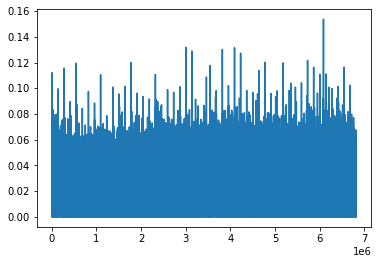

In [12]:
output_y2_complex = np.empty((len(output_y2),4),dtype=complex)

for i in range (0,len(output_y2)):
    output_y2_complex[i,0] = output_y2[i,0,0]+1j*output_y2[i,0,1]
    output_y2_complex[i,1] = output_y2[i,1,0]+1j*output_y2[i,1,1]
    output_y2_complex[i,2] = output_y2[i,2,0]+1j*output_y2[i,2,1]
    output_y2_complex[i,3] = output_y2[i,3,0]+1j*output_y2[i,3,1]
print(output_y2_complex.shape)
print(y.shape)
y = np.reshape(y,(-1,1))
output_y2_complex = np.reshape(output_y2_complex,(-1,1))
plt.plot(np.abs(y-output_y2_complex))
print(y[:2])
print(output_y2_complex[:2])


-20.80398556734941


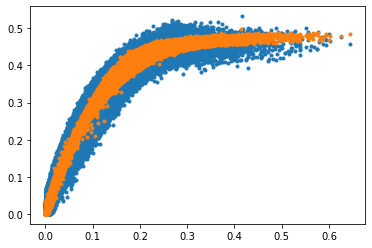

In [13]:
v = np.reshape(v,(-1,1))
plt.plot(np.abs(v), np.abs(y),'.')
plt.plot(np.abs(v), np.abs(output_y2_complex),'.')

#error=(np.sum(np.abs(y-y2))/N)*100
#NMSE
error=10*np.log10(np.sum(np.square(np.abs(y-output_y2_complex))/np.sum(np.square(np.abs(y)))))
print(error)

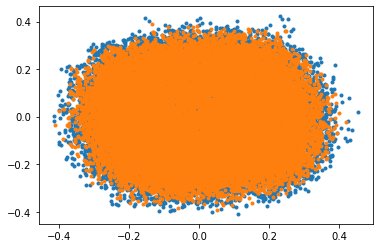

In [14]:
plt.plot(np.real(y[:20000]), np.imag(y[:20000]), '.')
plt.plot(np.real(output_y2_complex[:20000]), np.imag(output_y2_complex[:20000]), '.')